## Introduction of #metoo (24 sep to 31 Dec 2018)

After allegations against Harvey Weinstein, the use of the #MeToo hashtag on social media with respect to the event spread quickly in India, where sexual harassment is commonly referred to by the word 'eve-teasing', a term described as misleading, tame, and diluting the seriousness of the crime.

In [1]:
import os
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
%pwd

'C:\\Users\\Abhi\\Downloads'

In [3]:
%cd C:\\Users\\Abhi\\desktop

C:\Users\Abhi\desktop


In [4]:
metoo= pd.read_csv("metoo.csv", encoding='latin-1')

In [5]:
metoo.head()

,ID,datetime,has_media,is_reply,is_retweet,medias,nbr_favorite,nbr_reply,nbr_retweet,text,url,user_id,usernameTweet
0,1044955013007781888,2018-09-26 19:51:04,NaN,False,False,NaN,1,1,1,More power to #MeToo #MeTooBollywood #MeTooI...,/archthegr8/status/1044955013007781888,111292554,archthegr8
1,1044956538824269826,2018-09-26 19:57:07,NaN,False,False,NaN,0,0,1,Also why a movement like #WhyIDidntReport is ...,/prateekmathur03/status/1044956538824269826,132063997,prateekmathur03
2,1045510898767429632,2018-09-28 08:39:57,NaN,False,False,NaN,0,0,1,"To everyone who's asking ""why is she doing it ...",/Vedant_bhatkar/status/1045510898767429632,1389448536,Vedant_bhatkar
3,1045529007645757441,2018-09-28 09:51:55,NaN,False,False,NaN,0,0,0,Salute to the woman who dared to speak\n#metoo...,/sheejasthoughts/status/1045529007645757441,1680160753,sheejasthoughts
4,1045529169441038337,2018-09-28 09:52:33,NaN,False,False,NaN,0,0,1,Salute to the woman who dared to speak\n#metoo...,/sheejasthoughts/status/1045529169441038337,1680160753,sheejasthoughts


##  Standardization of the data 

In [6]:
metoo.shape

(45184, 13)

In [7]:
metoo.columns

Index(['ID', 'datetime', 'has_media', 'is_reply', 'is_retweet', 'medias',
       'nbr_favorite', 'nbr_reply', 'nbr_retweet', 'text', 'url', 'user_id',
       'usernameTweet'],
      dtype='object')

In [8]:
metoo = metoo.rename(columns={'is_reply': 'reply', 'is_retweet': 'retweet','nbr_favorite':'total favorites','nbr_reply':'total replies','nbr_retweet':'total retweets'})

In [9]:
metoo_clean= metoo

In [10]:
metoo_clean= metoo.drop(columns=["ID","user_id", "medias","has_media", "usernameTweet", "url"]) 

In [11]:
metoo_clean
pd.options.display.max_colwidth=-1

In [12]:
metoo_clean.head()

,datetime,reply,retweet,total favorites,total replies,total retweets,text
0,2018-09-26 19:51:04,False,False,1,1,1,More power to #MeToo #MeTooBollywood #MeTooIndia https://www. facebook.com/514537836/post s/10158459476747837/ Â â¦
1,2018-09-26 19:57:07,False,False,0,0,1,Also why a movement like #WhyIDidntReport is so important. The amount of victim blaming (and shaming) that has gone down in only a few hours is disgusting. \n\n#NanaPatekar #TanushreeDutta #TanushreeExposesBollywood #MeTooIndia https:// twitter.com/MeghnaPant/sta tus/1044915524499464192 Â â¦
2,2018-09-28 08:39:57,False,False,0,0,1,"To everyone who's asking ""why is she doing it now?"".10 saal pehle itne logo ne news dekhi tak nahi because mainstream media doesn't cover ""risky"" news against people with ""Good"" images, because people support the ""Image"" of their idol without knowing the man behind it.#metooindia"
3,2018-09-28 09:51:55,False,False,0,0,0,Salute to the woman who dared to speak\n#metoo #metoomovement #metooindia \n#Tanushreefight #NotOnlyHerStory https://www. instagram.com/p/BoQZZuvAmSd/ ?utm_source=ig_twitter_share&igshid=16o5s1mx1k7i4 Â â¦
4,2018-09-28 09:52:33,False,False,0,0,1,Salute to the woman who dared to speak\n#metoo #metoomovement #metooindia \n#Tanushreefight #NotOnlyHerStory https://www. instagram.com/p/BoQZZuvAmSd/ ?utm_source=ig_twitter_share&igshid=coduz5slrrza Â â¦


##   Distribution of Length of Tweet

In [13]:
metoo_clean['text']=metoo_clean['text'].str.strip().str.lower().str.replace('bindreviewcontent',"").str.replace(";","").str.replace('\n',"")

In [14]:
def getLength(message):
    message_token=message.split(" ") #taking the length of the words 
    return len(message_token)

In [15]:
metoo_clean['length_of_message']=metoo_clean['text'].apply(lambda message: getLength(message))

In [16]:
metoo_clean.head()

,datetime,reply,retweet,total favorites,total replies,total retweets,text,length_of_message
0,2018-09-26 19:51:04,False,False,1,1,1,more power to #metoo #metoobollywood #metooindia https://www. facebook.com/514537836/post s/10158459476747837/ â â¦,15
1,2018-09-26 19:57:07,False,False,0,0,1,also why a movement like #whyididntreport is so important. the amount of victim blaming (and shaming) that has gone down in only a few hours is disgusting. #nanapatekar #tanushreedutta #tanushreeexposesbollywood #metooindia https:// twitter.com/meghnapant/sta tus/1044915524499464192 â â¦,42
2,2018-09-28 08:39:57,False,False,0,0,1,"to everyone who's asking ""why is she doing it now?"".10 saal pehle itne logo ne news dekhi tak nahi because mainstream media doesn't cover ""risky"" news against people with ""good"" images, because people support the ""image"" of their idol without knowing the man behind it.#metooindia",45
3,2018-09-28 09:51:55,False,False,0,0,0,salute to the woman who dared to speak#metoo #metoomovement #metooindia #tanushreefight #notonlyherstory https://www. instagram.com/p/boqzzuvamsd/ ?utm_source=ig_twitter_share&igshid=16o5s1mx1k7i4 â â¦,21
4,2018-09-28 09:52:33,False,False,0,0,1,salute to the woman who dared to speak#metoo #metoomovement #metooindia #tanushreefight #notonlyherstory https://www. instagram.com/p/boqzzuvamsd/ ?utm_source=ig_twitter_share&igshid=coduz5slrrza â â¦,21


Text(0.5, 1.0, ' Distribution of Length of Message')

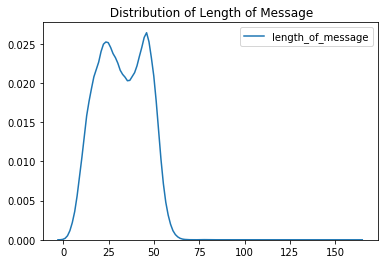

In [17]:
sns.kdeplot(metoo_clean['length_of_message']).set_title(" Distribution of Length of Message")

##  Distribution of number of Hashtags present in a tweet

In [18]:
import re
s = "I love #stackoverflow because #people are very #helpful!"
re.findall(r'#(\w+)', s)


['stackoverflow', 'people', 'helpful']

In [19]:
def has(rate):
    text=rate
    return re.findall("#(\w+)",text)

In [20]:
metoo_clean['hashtag']=metoo_clean['text'].apply(lambda x: has(x))

In [21]:
def en(rate):
    text=rate
    return len(text)

In [22]:
metoo_clean['length_of_hashtag']=metoo_clean['hashtag'].apply(lambda x: en(x))

In [23]:
metoo_clean.head()

,datetime,reply,retweet,total favorites,total replies,total retweets,text,length_of_message,hashtag,length_of_hashtag
0,2018-09-26 19:51:04,False,False,1,1,1,more power to #metoo #metoobollywood #metooindia https://www. facebook.com/514537836/post s/10158459476747837/ â â¦,15,"[metoo, metoobollywood, metooindia]",3
1,2018-09-26 19:57:07,False,False,0,0,1,also why a movement like #whyididntreport is so important. the amount of victim blaming (and shaming) that has gone down in only a few hours is disgusting. #nanapatekar #tanushreedutta #tanushreeexposesbollywood #metooindia https:// twitter.com/meghnapant/sta tus/1044915524499464192 â â¦,42,"[whyididntreport, nanapatekar, tanushreedutta, tanushreeexposesbollywood, metooindia]",5
2,2018-09-28 08:39:57,False,False,0,0,1,"to everyone who's asking ""why is she doing it now?"".10 saal pehle itne logo ne news dekhi tak nahi because mainstream media doesn't cover ""risky"" news against people with ""good"" images, because people support the ""image"" of their idol without knowing the man behind it.#metooindia",45,[metooindia],1
3,2018-09-28 09:51:55,False,False,0,0,0,salute to the woman who dared to speak#metoo #metoomovement #metooindia #tanushreefight #notonlyherstory https://www. instagram.com/p/boqzzuvamsd/ ?utm_source=ig_twitter_share&igshid=16o5s1mx1k7i4 â â¦,21,"[metoo, metoomovement, metooindia, tanushreefight, notonlyherstory]",5
4,2018-09-28 09:52:33,False,False,0,0,1,salute to the woman who dared to speak#metoo #metoomovement #metooindia #tanushreefight #notonlyherstory https://www. instagram.com/p/boqzzuvamsd/ ?utm_source=ig_twitter_share&igshid=coduz5slrrza â â¦,21,"[metoo, metoomovement, metooindia, tanushreefight, notonlyherstory]",5


## Graph is represention of  the number of hashtags in tweets

Text(0.5, 1.0, ' Distribution of hashtag')

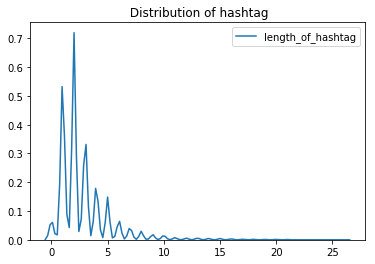

In [24]:
sns.kdeplot(metoo_clean['length_of_hashtag']).set_title(" Distribution of hashtag") 

##  Retweets Distribution

Text(0.5, 1.0, ' Distribution of Retweet')

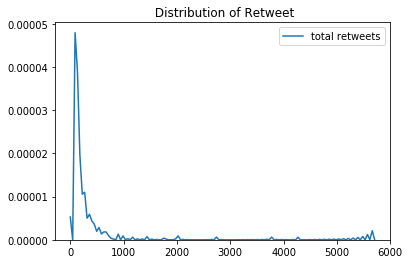

In [25]:
sns.kdeplot(metoo_clean['total retweets']).set_title(" Distribution of Retweet")

##  Number of Tweets tweeted based on Date

In [26]:
metoo_clean['datetime']= pd.to_datetime(metoo_clean['datetime'], errors='coerce')

In [27]:
metoo_clean['date']=metoo_clean['datetime'].dt.date

In [28]:
value_counts=metoo_clean['date'].value_counts()

In [29]:
df = value_counts.rename_axis('unique_dates').reset_index(name='counts')

C:\Users\Abhi\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


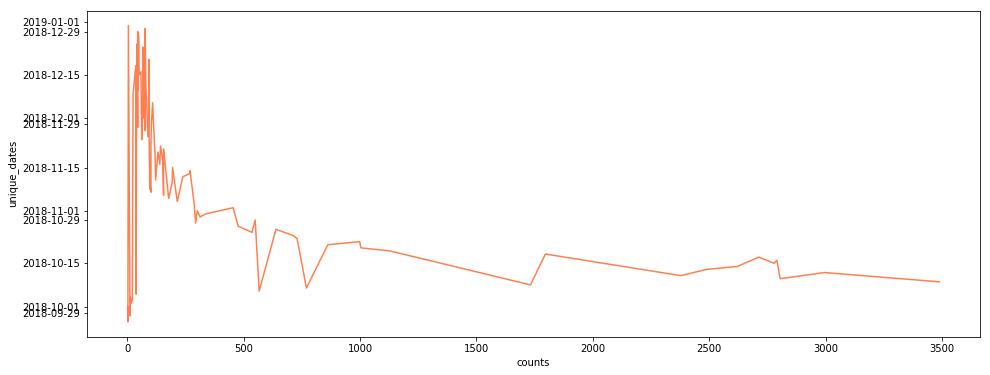

In [30]:
plt.figure(figsize=(16,6))
ax=sns.lineplot(x='counts',y='unique_dates', color="coral", data=df,estimator=None)

## Graph on date basis is not clear. So that's y i am taking weekly basis data

In [31]:
metoo_clean['week']=metoo_clean['datetime'].dt.week


In [32]:
value_week=metoo_clean['week'].value_counts()

In [33]:
df2 = value_week.rename_axis('unique_week').reset_index(name='counts')

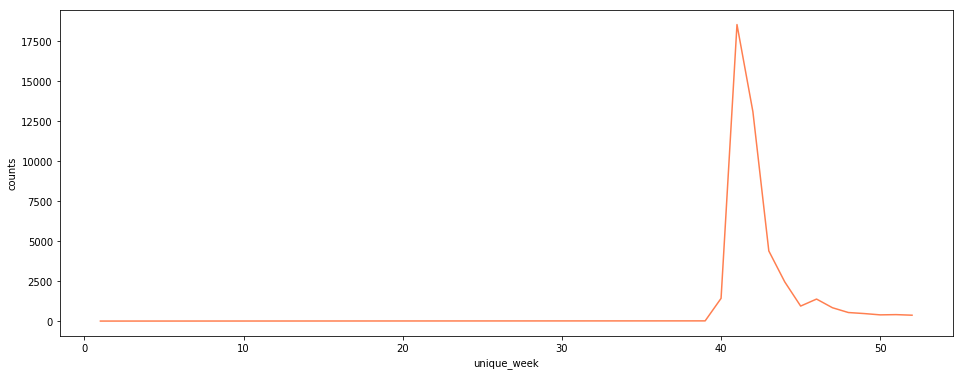

In [34]:
plt.figure(figsize=(16,6))
ax=sns.lineplot(x='unique_week',y='counts', color="coral",data=df2,estimator=None)

####  as from the above graph we can see between week 40 to 50 tweets volume is more

##   Particular hour where the number of tweets were higher

In [35]:
metoo_clean['hour']=metoo_clean['datetime'].dt.hour

In [36]:
value_hours=metoo_clean['hour'].value_counts()

In [37]:
df1 = value_hours.rename_axis('unique_hours').reset_index(name='counts')
   

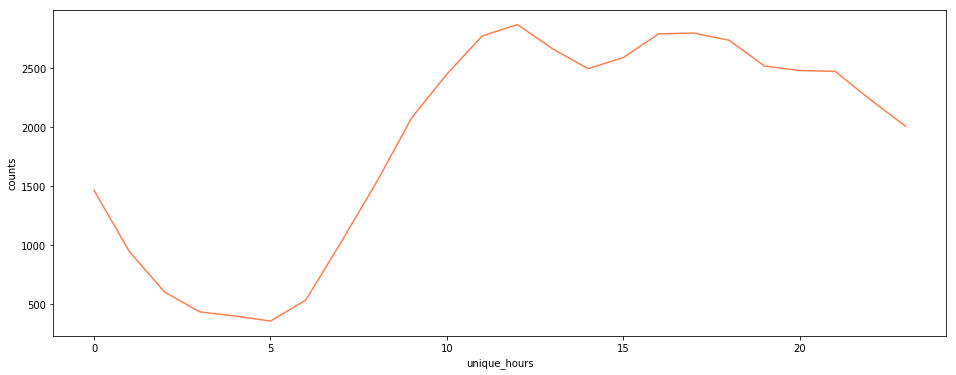

In [38]:
plt.figure(figsize=(16,6))
ax=sns.lineplot(x='unique_hours',y='counts', color="coral",data=df1,estimator=None)

#### between the range of 10 to 15 timing tweet volume is high 

##  Other hashtags commonly occur with the hashtag

In [39]:
# take the rows from the hashtag columns where there are actually hashtags
hashtags_list_df = metoo_clean.loc[metoo_clean.hashtag.apply(lambda hashtags_list: hashtags_list !=[]),['hashtag']]

In [40]:

# create dataframe where each use of hashtag gets its own row
flattened_hashtags_df = pd.DataFrame(
    [hashtag for hashtags_list in hashtags_list_df.hashtag
    for hashtag in hashtags_list],
    columns=['hashtag'])

In [41]:
flattened_hashtags_df['hashtag'].unique().size

11025

In [42]:
# count of appearances of each hashtag
popular_hashtags = flattened_hashtags_df.groupby('hashtag').size()\
                                        .reset_index(name='counts')\
                                        .sort_values('counts', ascending=False)\
                                        .reset_index(drop=True)

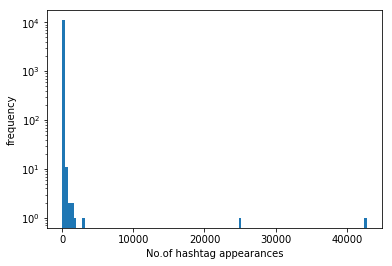

In [43]:
# number of times each hashtag appears
counts = flattened_hashtags_df.groupby(['hashtag']).size()\
                              .reset_index(name='counts')\
                              .counts

# define bins for histogram                              
my_bins = np.arange(0,counts.max()+400, 400)-0.5

# plot histogram of tweet counts
plt.figure()
plt.hist(counts, bins = my_bins)
plt.xlabels = np.arange(1,counts.max()+400, 400)
plt.xlabel('No.of hashtag appearances')
plt.ylabel('frequency')
plt.yscale('log', nonposy='clip')
plt.show()

In [44]:
type(metoo_clean['hashtag'])

pandas.core.series.Series

In [45]:

metoo_clean['hashtag']= metoo_clean['hashtag'].astype(str)

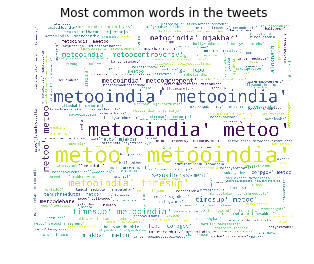

In [50]:
import os
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
import string
from nltk.corpus import stopwords

from nltk import PorterStemmer

pd.set_option('max_colwidth', 100)
import numpy as np
from PIL import Image
%matplotlib inline

maskArray = np.array(Image.open("Bird.png"))
wordcloud = WordCloud(height=2000, width=2000, stopwords=set(stopwords.words('english')),mask = maskArray, background_color='white')
wordcloud = wordcloud.generate(' '.join(metoo_clean['hashtag'].tolist()))
plt.imshow(wordcloud)
wordcloud.to_file("wordhash.png")
plt.title("Most common words in the tweets")    ### for most frequent words in hashtags
plt.axis('off')
plt.show()

###  In data set, volume of Metooindia is more than other hashtags. Total 11025 unique hashtags are present in the data set.

###  Sentiment VADER or TextBlob identify the sentiment of the tweet

In [51]:
!pip install vaderSentiment 

In [52]:
#using vader sentiment to get positives and negative of the statement

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer 
  
# function to print sentiments 
# of the sentence. 

In [53]:
def sentiment_score(sentence):
    sid_obj = SentimentIntensityAnalyzer() # polarity_scores method of SentimentIntensityAnalyzer 
    # oject gives a sentiment dictionary.  
    sentiment_dict = sid_obj.polarity_scores(sentence)  # which contains pos, neg, neu, and compound scores.
    # decide sentiment as positive, negative and neutral 
    if sentiment_dict['compound'] >= 0.05 : 
        return("Positive") 
  
    elif sentiment_dict['compound'] <= - 0.05 : 
        return("Negative") 
  
    else : 
        return("Neutral") 
        

In [54]:
metoo_clean['sentiment']= metoo_clean['text'].apply(lambda x:sentiment_score(x))

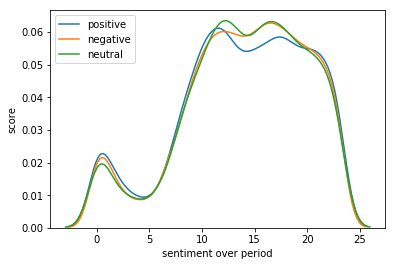

In [55]:
sns.kdeplot(metoo_clean.loc[metoo_clean['sentiment']== 'Positive',"hour"],label='positive');
sns.kdeplot(metoo_clean.loc[metoo_clean['sentiment']== 'Negative' ,"hour"],label='negative');
sns.kdeplot(metoo_clean.loc[metoo_clean['sentiment']== 'Neutral',"hour"],label='neutral');

# beautifying the labels
plt.xlabel('sentiment over period')
plt.ylabel('score')
plt.show()

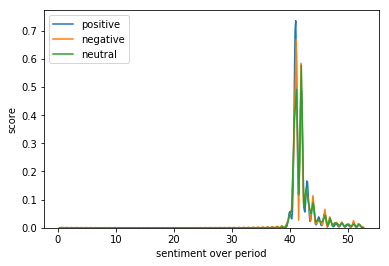

In [56]:
sns.kdeplot(metoo_clean.loc[metoo_clean['sentiment']== 'Positive',"week"],label='positive');
sns.kdeplot(metoo_clean.loc[metoo_clean['sentiment']== 'Negative' ,"week"],label='negative');
sns.kdeplot(metoo_clean.loc[metoo_clean['sentiment']== 'Neutral',"week"],label='neutral');

# beautifying the labels
plt.xlabel('sentiment over period')
plt.ylabel('score')
plt.show()

### Sentiment over period

we can see the sentiment of the people is neutral over period of time.(hourly,weekly)

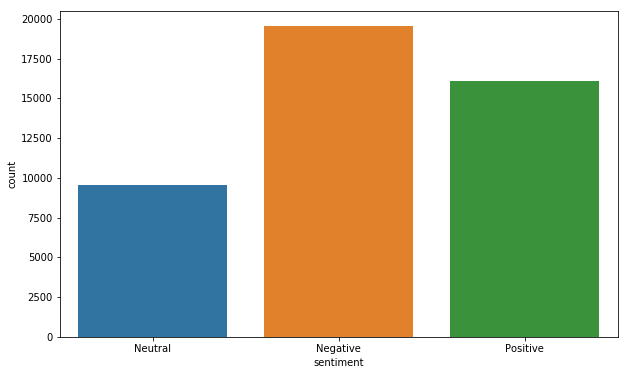

In [57]:
plt.figure(figsize=(10,6))
sns.countplot(metoo_clean['sentiment'])     

### Q.08 What words come mostly frequently in Tweet - unigram, bigram and trigrams

In [59]:
def getMostCommon(tweets_list,topn=20):
    tweets=" ".join(tweets_list)
    tokenised_tweets=tweets.split(" ")
    
    
    freq_counter=Counter(tokenised_tweets)
    return freq_counter.most_common(topn) # return words with the highest frequencies

In [60]:
from collections import Counter

In [64]:
import string
from nltk.corpus import stopwords

from nltk import PorterStemmer

clean=""
def clean_text(clean):
    ps=PorterStemmer()
    clean = clean.translate(str.maketrans({key: " {0} ".format(key) for key in string.punctuation}))
    #remove extra white space
    
    text_cleaned=re.sub(r'^https?:\/\/.*[\r\n]*', '',clean,flags=re.MULTILINE)
    text_cleaned="".join([x for x in clean if x not in string.punctuation])
    text_cleaned=re.sub('\n','',text_cleaned)
    text_cleaned=re.sub('\d+','',text_cleaned)
    text_cleaned=re.sub('twitter .com','',text_cleaned)
    Stopwords=stopwords.words('english')

    text_cleaned=re.sub(' +', ' ', text_cleaned)
    text_cleaned=text_cleaned.lower()
    tokens=text_cleaned.split(" ")
    tokens=[token for token in tokens if token not in Stopwords]
    text_cleaned=" ".join([ps.stem(token) for token in tokens])    
    
    return text_cleaned


print(clean_text(clean))

In [65]:
metoo_clean['cleaned_tweet']=metoo_clean['text'].apply(lambda x:clean_text(x))
metoo_clean.head()

,datetime,reply,retweet,total favorites,total replies,total retweets,text,length_of_message,hashtag,length_of_hashtag,date,week,hour,sentiment,cleaned_tweet
0,2018-09-26 19:51:04,False,False,1,1,1,more power to #metoo #metoobollywood #metooindia https://www. facebook.com/514537836/post s/...,15,"['metoo', 'metoobollywood', 'metooindia']",3,2018-09-26,39,19,Neutral,power metoo metoobollywood metooindia http www facebook com post â â¦
1,2018-09-26 19:57:07,False,False,0,0,1,also why a movement like #whyididntreport is so important. the amount of victim blaming (and sh...,42,"['whyididntreport', 'nanapatekar', 'tanushreedutta', 'tanushreeexposesbollywood', 'metooindia']",5,2018-09-26,39,19,Negative,also movement like whyididntreport import amount victim blame shame gone hour disgust nanapateka...
2,2018-09-28 08:39:57,False,False,0,0,1,"to everyone who's asking ""why is she doing it now?"".10 saal pehle itne logo ne news dekhi tak na...",45,['metooindia'],1,2018-09-28,39,8,Positive,everyon ask saal pehl itn logo ne news dekhi tak nahi mainstream media cover riski news peopl go...
3,2018-09-28 09:51:55,False,False,0,0,0,salute to the woman who dared to speak#metoo #metoomovement #metooindia #tanushreefight #noto...,21,"['metoo', 'metoomovement', 'metooindia', 'tanushreefight', 'notonlyherstory']",5,2018-09-28,39,9,Neutral,salut woman dare speak metoo metoomov metooindia tanushreefight notonlyherstori http www instagr...
4,2018-09-28 09:52:33,False,False,0,0,1,salute to the woman who dared to speak#metoo #metoomovement #metooindia #tanushreefight #noto...,21,"['metoo', 'metoomovement', 'metooindia', 'tanushreefight', 'notonlyherstory']",5,2018-09-28,39,9,Neutral,salut woman dare speak metoo metoomov metooindia tanushreefight notonlyherstori http www instagr...


In [66]:
positive_tweets=metoo_clean.loc[metoo_clean['sentiment']== 'Positive','cleaned_tweet']

In [67]:
top_20_positive_tweet_words=getMostCommon(positive_tweets,20)

In [68]:
negative_tweets=metoo_clean.loc[metoo_clean['sentiment']== 'Negative','cleaned_tweet']

In [69]:
top_20_negative_tweet_words=getMostCommon(negative_tweets,20)

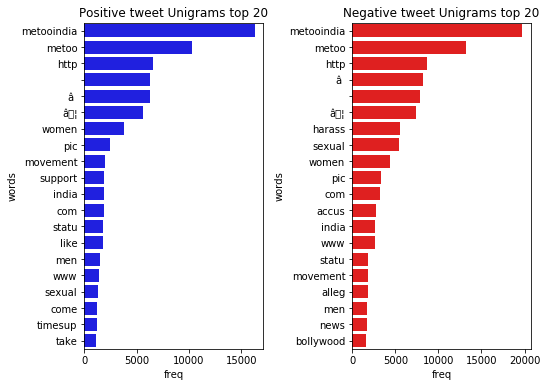

In [70]:
def plotMostCommonWords(tweets_list,topn=20,title="Common tweet Words",color="blue",axis=None): #default number of words is given as 20
    top_words=getMostCommon(tweets_list,topn=topn)
    data=pd.DataFrame()
    data['words']=[val[0] for val in top_words]
    data['freq']=[val[1] for val in top_words]
    if axis!=None:
        sns.barplot(y='words',x='freq',data=data,color=color,ax=axis).set_title(title+" top "+str(topn))
    else:
        sns.barplot(y='words',x='freq',data=data,color=color).set_title(title+" top "+str(topn))

        
from matplotlib import rcParams

rcParams['figure.figsize'] = 8,6 ## Sets the heigth and width of image

                ## single words in a tweets
fig,ax=plt.subplots(1,2)
fig.subplots_adjust(wspace=0.5) #Adjusts the space between the two plots
plotMostCommonWords(positive_tweets,20,"Positive tweet Unigrams",axis=ax[0])

plotMostCommonWords(negative_tweets,20,"Negative tweet Unigrams",color="red",axis=ax[1])


## Bigrams
Distribution of postive and negative tweets

In [71]:
def generateNGram(text,n):
    tokens=text.split(" ")
    ngrams = zip(*[tokens[i:] for i in range(n)])
    return ["_".join(ngram) for ngram in ngrams]

In [74]:
positive_tweets_bigrams=[" ".join(generateNGram(tweet,2)) for tweet in positive_tweets]
negative_tweets_bigrams=[" ".join(generateNGram(tweet,2)) for tweet in negative_tweets] 

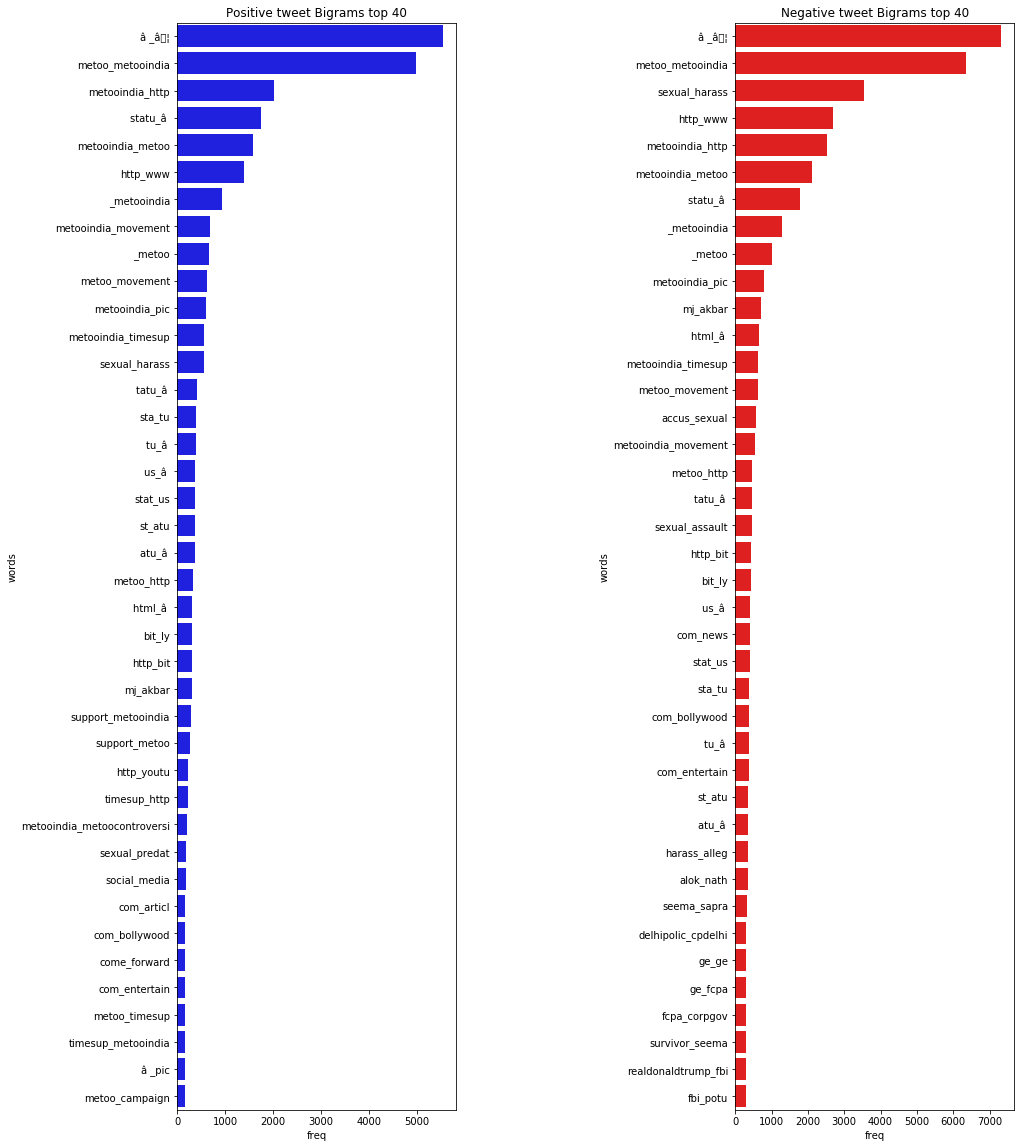

In [75]:
rcParams['figure.figsize'] = 15,20
fig,ax=plt.subplots(1,2)        ### combination of two words in tweets
fig.subplots_adjust(wspace=1)
plotMostCommonWords(positive_tweets_bigrams,40,"Positive tweet Bigrams",axis=ax[0])

plotMostCommonWords(negative_tweets_bigrams,40,"Negative tweet Bigrams",color="red",axis=ax[1])

### Trigrams
Distribution of postive and negative tweets

In [76]:
positive_tweets_trigrams=[" ".join(generateNGram(tweet,3)) for tweet in positive_tweets]
negative_tweets_trigrams=[" ".join(generateNGram(tweet,3)) for tweet in negative_tweets]
positive_tweets_trigrams[:5]

['everyon_ask_saal ask_saal_pehl saal_pehl_itn pehl_itn_logo itn_logo_ne logo_ne_news ne_news_dekhi news_dekhi_tak dekhi_tak_nahi tak_nahi_mainstream nahi_mainstream_media mainstream_media_cover media_cover_riski cover_riski_news riski_news_peopl news_peopl_good peopl_good_imag good_imag_peopl imag_peopl_support peopl_support_imag support_imag_idol imag_idol_without idol_without_know without_know_man know_man_behind man_behind_metooindia',
 'metooindia_maam_cast maam_cast_couch cast_couch_harass couch_harass_women harass_women_movi women_movi_industri movi_industri_real industri_real_final real_final_somebodi final_somebodi_speak somebodi_speak_pleas speak_pleas_support pleas_support_tanushreedutta support_tanushreedutta_',
 'brilliant_metooindia_courageiscontagi metooindia_courageiscontagi_tanushreedutta courageiscontagi_tanushreedutta_dutta tanushreedutta_dutta_datta dutta_datta_tanushreedutta datta_tanushreedutta_reallyswara tanushreedutta_reallyswara_sethshruti reallyswara_sethshru

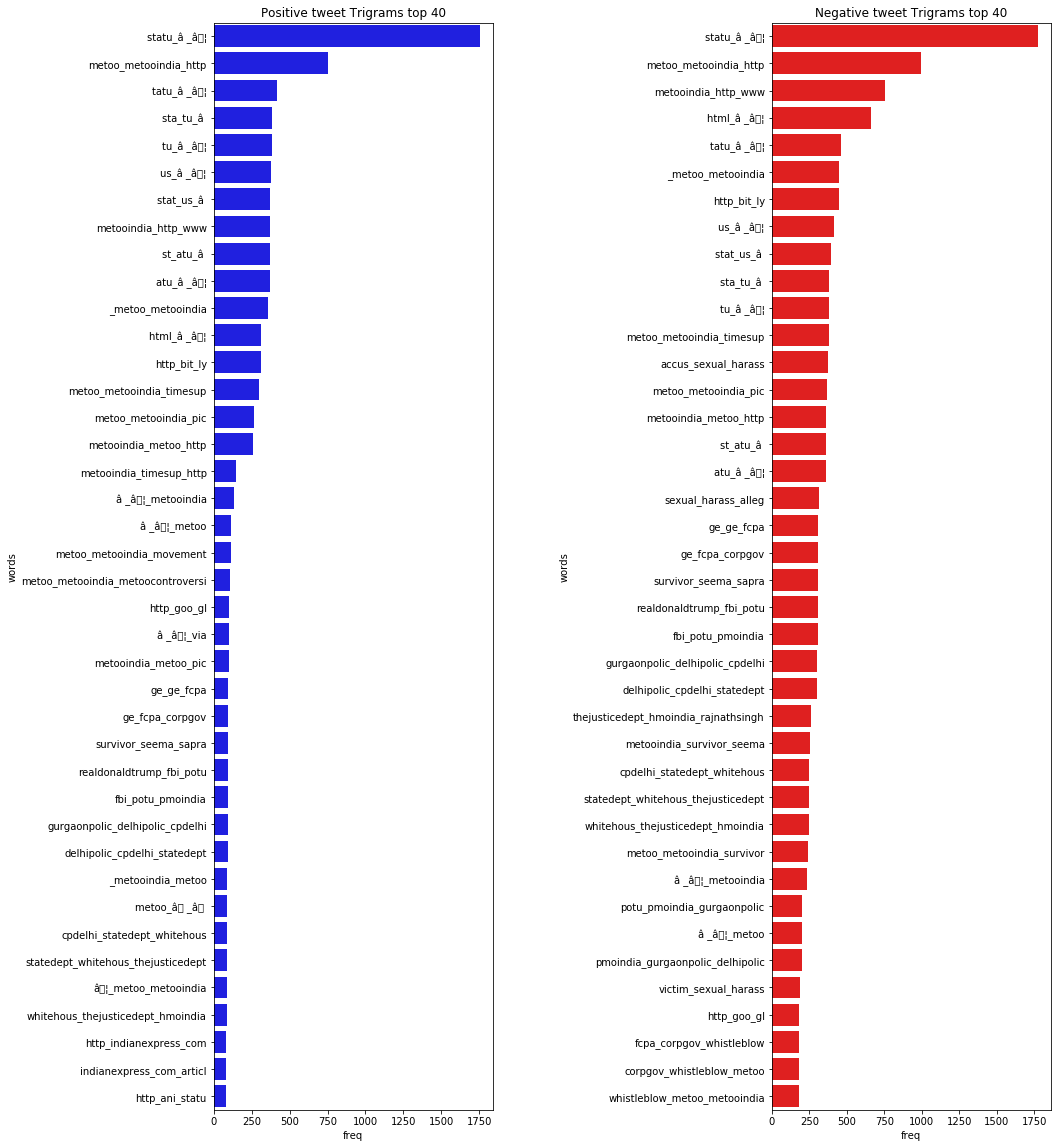

In [77]:
rcParams['figure.figsize'] = 15,20
fig,ax=plt.subplots(1,2)
fig.subplots_adjust(wspace=1)       ### combination of threewords in a tweets
plotMostCommonWords(positive_tweets_trigrams,40,"Positive tweet Trigrams",axis=ax[0])

plotMostCommonWords(negative_tweets_trigrams,40,"Negative tweet Trigrams",color="red",axis=ax[1])

## Q.10 Cluster the Tweets (use Concept of Topic Modelling) and identify predominant topics

In [78]:
!pip install gensim 

In [86]:
import gensim
from gensim import corpora

C:\Users\Abhi\Anaconda3\lib\site-packages\scipy\sparse\sparsetools.py:21: DeprecationWarning: `scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.
  _deprecated()


In [92]:
from sklearn.feature_extraction.text import CountVectorizer

In [96]:
bow=CountVectorizer()
bow_metoo = bow.fit_transform(metoo_clean['cleaned_tweet'])

In [97]:
len(bow.vocabulary_)

51819

In [99]:
metoo_clean4=metoo_clean.iloc[20]['cleaned_tweet']
metoo_clean4

' metooindia meneka gandhi back tanushreedutta emphasis need start campaign like metoo â\x81\xa0india say â\x80\x9cwoman harass point write us investig â\x80\x9d indiaaheadnew pic kwfjxsvmn'

In [100]:
metoo_clean4_transform=bow.transform([metoo_clean4])
print(metoo_clean4_transform)

  (0, 3638)	1
  (0, 6540)	1
  (0, 12624)	1
  (0, 15425)	1
  (0, 17150)	1
  (0, 19578)	1
  (0, 19584)	1
  (0, 20241)	1
  (0, 23688)	1
  (0, 24524)	1
  (0, 26574)	1
  (0, 26766)	1
  (0, 26870)	1
  (0, 29326)	1
  (0, 33068)	1
  (0, 33509)	1
  (0, 38941)	1
  (0, 42062)	1
  (0, 43622)	1
  (0, 46894)	1
  (0, 49410)	1
  (0, 49828)	1


In [101]:
j = bow.transform([metoo_clean4]).toarray()[0]

print('index\tterm\tcount')
for i in range(len(j)):
    if j[i] != 0:
        print(i, bow.get_feature_names()[i],j[i],sep='\t')

index	term	count
3638	back	1
6540	campaign	1
12624	emphasis	1
15425	gandhi	1
17150	harass	1
19578	india	1
19584	indiaaheadnew	1
20241	investig	1
23688	kwfjxsvmn	1
24524	like	1
26574	meneka	1
26766	metoo	1
26870	metooindia	1
29326	need	1
33068	pic	1
33509	point	1
38941	say	1
42062	start	1
43622	tanushreedutta	1
46894	us	1
49410	woman	1
49828	write	1


In [102]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(
    min_df = 5,
    max_df = 0.95,
    max_features = 8000,
    stop_words = 'english'
)
tfidf.fit(metoo_clean.cleaned_tweet)
text = tfidf.transform(metoo_clean.cleaned_tweet)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.95, max_features=8000, min_df=5,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words='english', strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

Fit 1 clusters
Fit 5 clusters
Fit 9 clusters
Fit 13 clusters
Fit 17 clusters
Fit 21 clusters


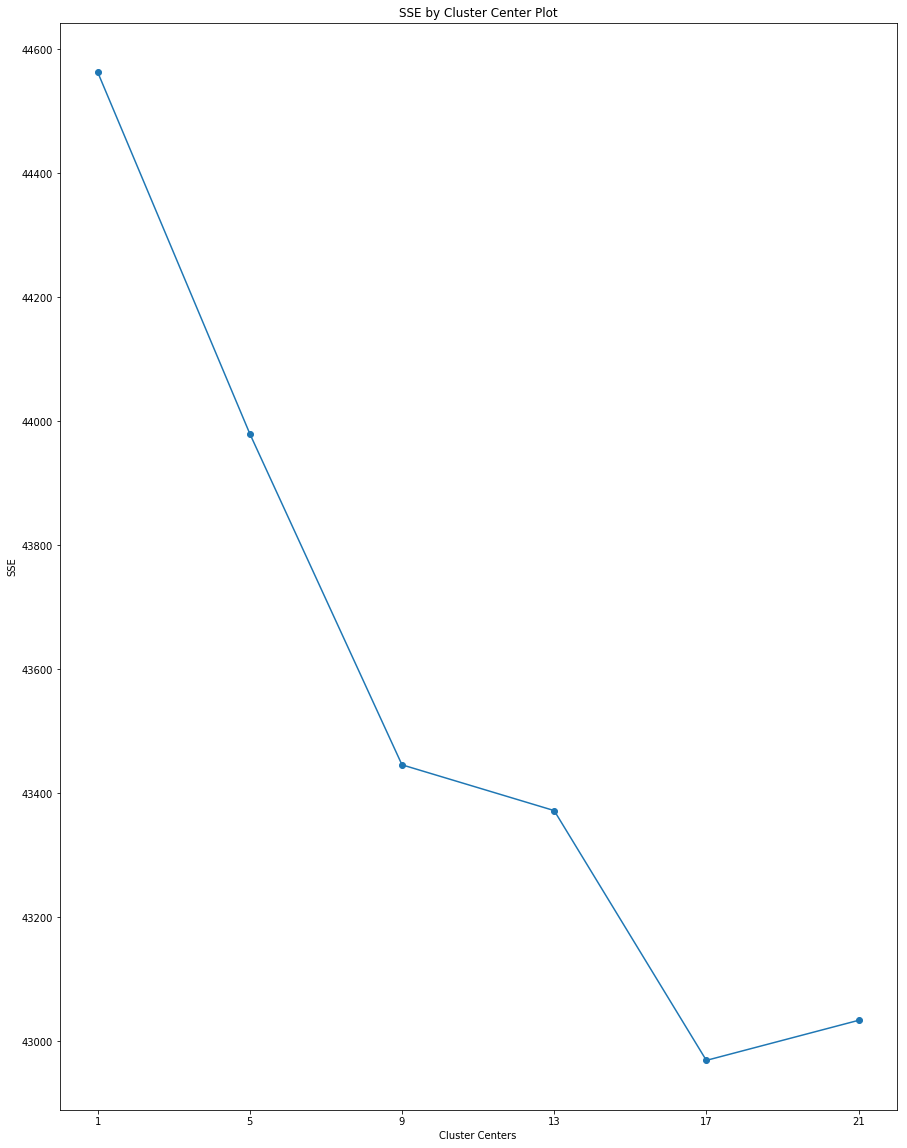

In [104]:
from sklearn.cluster import MiniBatchKMeans
def find_optimal_clusters(metoo_clean, max_k):
    iters = range(1, max_k+3,4)
    
    sse = []
    for k in iters:
        sse.append(MiniBatchKMeans(n_clusters=k, init_size=1024, batch_size=2048, random_state=20).fit(metoo_clean).inertia_)
        print('Fit {} clusters'.format(k))
        
    f, ax = plt.subplots(1, 1)
    ax.plot(iters, sse, marker='o')
    ax.set_xlabel('Cluster Centers')
    ax.set_xticks(iters)
    ax.set_xticklabels(iters)
    ax.set_ylabel('SSE')
    ax.set_title('SSE by Cluster Center Plot')
    
find_optimal_clusters(text,22)

In [105]:
clusters = MiniBatchKMeans(n_clusters=12, init_size=1024, batch_size=2048, random_state=70).fit_predict(text)

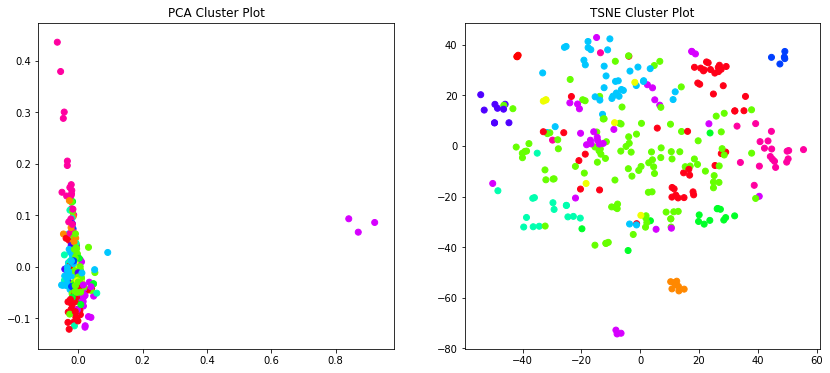

In [106]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from matplotlib import cm
def plot_tsne_pca(data, labels):
    max_label = max(labels)
    max_items = np.random.choice(range(metoo_clean.shape[0]), size=3000, replace=False)
    
    pca = PCA(n_components=2).fit_transform(data[max_items,:].todense())
    tsne = TSNE().fit_transform(PCA(n_components=50).fit_transform(data[max_items,:].todense()))
    
    
    idx = np.random.choice(range(pca.shape[0]), size=300, replace=False)
    label_subset = labels[max_items]
    label_subset = [cm.hsv(i/max_label) for i in label_subset[idx]]
    
    f, ax = plt.subplots(1, 2, figsize=(14, 6))
    
    ax[0].scatter(pca[idx, 0], pca[idx, 1], c=label_subset)
    ax[0].set_title('PCA Cluster Plot')
    
    ax[1].scatter(tsne[idx, 0], tsne[idx, 1], c=label_subset)
    ax[1].set_title('TSNE Cluster Plot')
    
plot_tsne_pca(text, clusters)